<a href="https://colab.research.google.com/github/kluo9/HM-personalized-fashion-recommendation/blob/main/hm_data_modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

In [ ]:
! pip install -q kaggle
from google.colab import files

In [ ]:
uploaded = files.upload() # upload kaggle token downloaded from kaggle personal account page 'kaggle.json'

Saving kaggle.json to kaggle.json


In [ ]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f transactions_train.csv
! kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f customers.csv
! kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f articles.csv

100% 584M/584M [00:09<00:00, 90.6MB/s]
100% 584M/584M [00:09<00:00, 67.4MB/s]
 99% 97.0M/97.9M [00:01<00:00, 118MB/s] 
100% 97.9M/97.9M [00:01<00:00, 92.1MB/s]
  0% 0.00/4.26M [00:00<?, ?B/s]
100% 4.26M/4.26M [00:00<00:00, 85.0MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
transaction_df = pd.read_csv('/content/transactions_train.csv.zip')

In [ ]:
transaction_df['t_dat'] = pd.to_datetime(transaction_df['t_dat'])
transaction_df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [ ]:
customers_df = pd.read_csv('/content/customers.csv.zip')
customers_df
# FN is if a customer get Fashion News newsletter, Active is if the customer is active for communication, sales channel id, 2 is online and 1 store.

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [ ]:
articles_df = pd.read_csv('/content/articles.csv.zip')
articles_df

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


# Check Data

In [ ]:
# check missingness in transaction data
print("data length:", len(transaction_df))
print('-------------------------------')
print(transaction_df.describe())
print('-------------------------------')
# null count:
print(transaction_df.isnull().sum())
# no missing

data length: 31788324
-------------------------------
         article_id         price  sales_channel_id
count  3.178832e+07  3.178832e+07      3.178832e+07
mean   6.962272e+08  2.782927e-02      1.704028e+00
std    1.334480e+08  1.918113e-02      4.564786e-01
min    1.087750e+08  1.694915e-05      1.000000e+00
25%    6.328030e+08  1.581356e-02      1.000000e+00
50%    7.145820e+08  2.540678e-02      2.000000e+00
75%    7.865240e+08  3.388136e-02      2.000000e+00
max    9.562170e+08  5.915254e-01      2.000000e+00
-------------------------------
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


In [ ]:
# check customer data
print("data length:", len(customers_df))
print('-------------------------------')
# null count:
print(customers_df.isnull().sum())
print('-------------------------------')
# customer id duplications?
unique_id = sorted(customers_df['customer_id'].unique())
print('unique id:', len(unique_id))  # no duplicates

data length: 1371980
-------------------------------
customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64
-------------------------------
unique id: 1371980


In [ ]:
# check article
print("data length:", len(articles_df))
print('-------------------------------')
# null count:
print(articles_df.isnull().sum())

data length: 105542
-------------------------------
article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64


# Exploratory plot

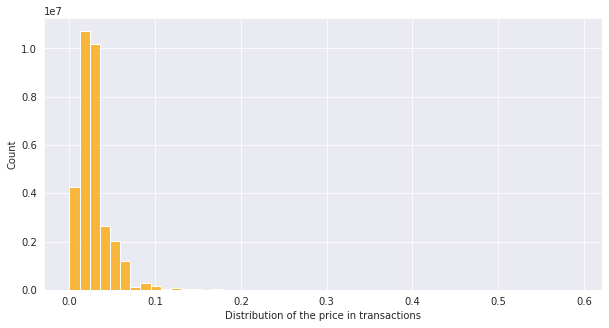

In [ ]:
# plot price/sales_channel_id in transaction data
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=transaction_df, x='price', bins=50, color='orange')
ax.set_xlabel('Distribution of the price in transactions')
plt.show()
# some extreme values in price

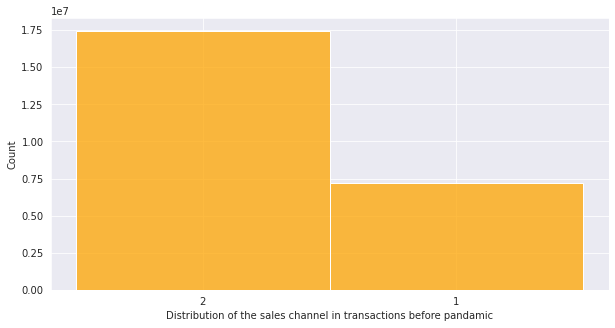

In [ ]:
transaction_df['sales_channel_id'] = transaction_df['sales_channel_id'].astype(str)
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=transaction_df[transaction_df['t_dat']<'2020-04-15'], x='sales_channel_id',color='orange')
ax.set_xlabel('Distribution of the sales channel in transactions before pandamic')
plt.show()

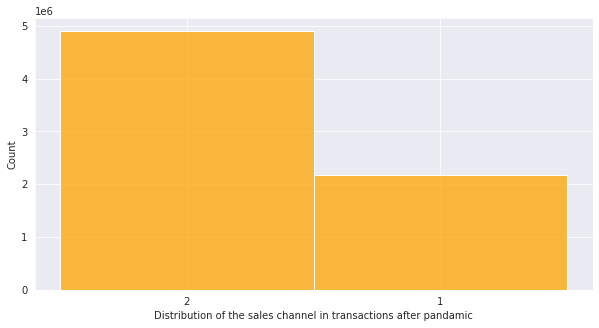

In [ ]:
transaction_df['sales_channel_id'] = transaction_df['sales_channel_id'].astype(str)
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=transaction_df[transaction_df['t_dat']>'2020-04-15'], x='sales_channel_id',color='orange')
ax.set_xlabel('Distribution of the sales channel in transactions after pandamic')
plt.show()

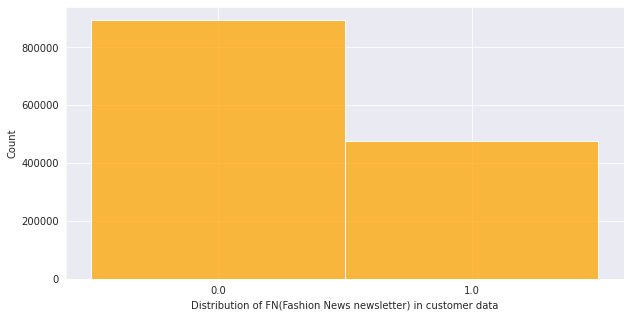

In [ ]:
# plot FN/Active/club_member_status/fashion_news_frequency/age in customer data
customers_df['FN'] = customers_df['FN'].fillna(0) # NaN in FN converted to 0
customers_df['FN'] = customers_df['FN'].astype(str)
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers_df, x='FN',color='orange')
ax.set_xlabel('Distribution of FN(Fashion News newsletter) in customer data')
plt.show()

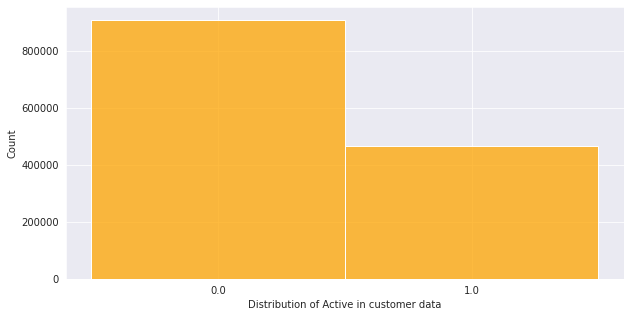

array([[1.        , 0.97994748],
       [0.97994748, 1.        ]])

In [ ]:
customers_df['Active'] = customers_df['Active'].fillna(0) # NaN in Active converted to 0
customers_df['Active'] = customers_df['Active'].astype(str)
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers_df, x='Active',color='orange')
ax.set_xlabel('Distribution of Active in customer data')
plt.show()
# very similar to FN
# calculate correlation:
np.corrcoef(pd.to_numeric(customers_df['FN']), pd.to_numeric(customers_df['Active'])) # highly correlated

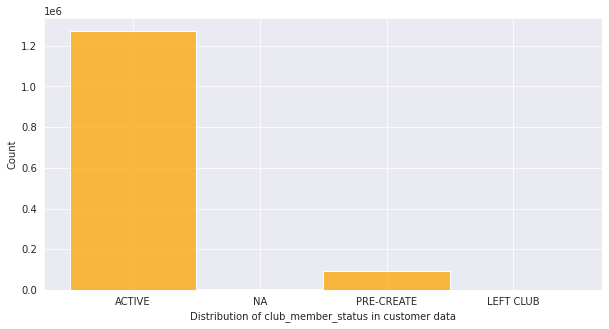

In [ ]:
customers_df['club_member_status'] = customers_df['club_member_status'].fillna('NA') # NaN in club_member_status converted to na
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers_df, x='club_member_status',color='orange')
ax.set_xlabel('Distribution of club_member_status in customer data')
plt.show() # need to fill NA

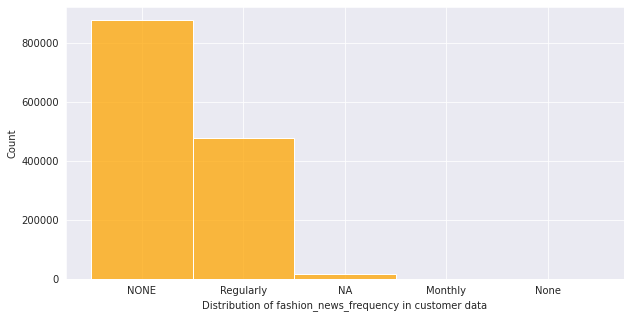

In [ ]:
customers_df['fashion_news_frequency'] = customers_df['fashion_news_frequency'].fillna('NA') # NaN in club_member_status converted to na
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers_df, x='fashion_news_frequency',color='orange')
ax.set_xlabel('Distribution of fashion_news_frequency in customer data')
plt.show()
# two types of None: NONE and None, need to combine both

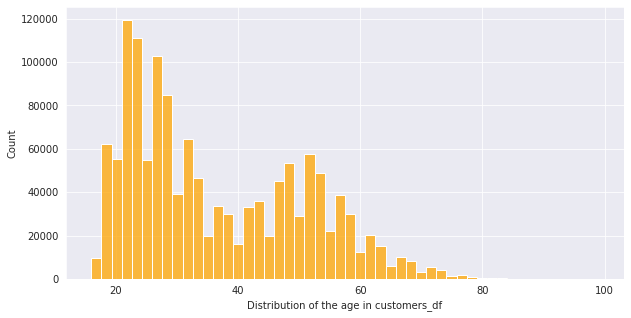

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers_df, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution of the age in customers_df')
plt.show()
# The most common age is 21-23

# Data modification

In [ ]:
## fill in the NA's or None's in Customer data
# club_member_status: fill na with mode:
customers_df['club_member_status'] = customers_df['club_member_status'].fillna(customers_df['club_member_status'].mode()[0])
# fashion_news_frequency: change None to NONE and fill NA with NONE:
customers_df['fashion_news_frequency'] = customers_df['fashion_news_frequency'].fillna("NONE")
customers_df['fashion_news_frequency'] = customers_df['fashion_news_frequency'].replace('None','NONE')
# age: fill with mode:
customers_df['age'] = customers_df['age'].fillna(customers_df['age'].mode()[0])


# Feature generation

In [ ]:
# create total revenue of each customer last year (2018-09-20 to 2019-09-19)
# first generate inquire table (transactions from 2018-09-20 to 2019-09-19)
# also generate table with transactions from 2019-09-20 to now
transaction_df_pre = transaction_df[transaction_df['t_dat']<='2019-09-19']
transaction_df_cur = transaction_df[transaction_df['t_dat']>='2019-09-20']

In [ ]:
# total sales for each customer in previous year
transaction_customer_sales = transaction_df_pre[['customer_id','price']].groupby('customer_id').sum()
# mean price for each customer in previous year
transaction_customer_sales_mean = transaction_df_pre[['customer_id','price']].groupby('customer_id').mean()
# median price for each customer in previous year
transaction_customer_sales_median = transaction_df_pre[['customer_id','price']].groupby('customer_id').median()
# sd of price for each customer in previous year
transaction_customer_sales_sd = transaction_df_pre[['customer_id','price']].groupby('customer_id').std()
# total number of transactions for each customer in previous year
transaction_customer_n_trans = transaction_df_pre[['customer_id','price']].groupby('customer_id').size()
transaction_customer_n_trans = transaction_customer_n_trans.to_frame()
# total sales for each customer in current year: as response
transaction_customer_sales_cur = transaction_df_cur[['customer_id','price']].groupby('customer_id').sum()

In [ ]:
# sales_channel from transactions in previous year
transaction_sales_channel = transaction_df_pre[['customer_id','sales_channel_id']].pivot_table(index=['customer_id'], columns='sales_channel_id', aggfunc='size', fill_value=0)
transaction_sales_channel

sales_channel_id,1,2
customer_id,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,5,4
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,3,48
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0,4
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,2,2
...,...,...
ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae5bdfa4cf4b5874c806,3,0
ffffaff3905b803d1c7e153a1378a5151e1f34f236ba5451afc7cf3f699c5690,1,0
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,1,22


In [ ]:
# generate month of purchase in the transaction table
transaction_df_pre['month'] = np.array(list(map(lambda x: x.month, transaction_df_pre['t_dat'])))
transaction_df_pre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,t_dat,customer_id,article_id,price,sales_channel_id,month
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,9
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,9
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,9
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,9
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,9
...,...,...,...,...,...,...
16803896,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,764525002,0.015237,2,9
16803897,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,764525002,0.015237,2,9
16803898,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,703558001,0.022017,2,9
16803899,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,703558001,0.022017,2,9


In [ ]:
# create a feature of last year's transaction month
transaction_sales_month = transaction_df_pre[['customer_id','month']].pivot_table(index=['customer_id'], columns='month', aggfunc='size', fill_value=0)
transaction_sales_month

month,1,2,3,4,5,6,7,8,9,10,11,12
customer_id,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0,0,0,0,3,0,2,0,1,0,0,3
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,1,0,0,4,12,8,13,5,8,0,0,0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0,0,1,0,0,0,0,0,3,0,0,0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0,0,0,0,0,2,0,0,0,0,0,0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0,0,2,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae5bdfa4cf4b5874c806,0,0,0,0,0,0,0,0,0,3,0,0
ffffaff3905b803d1c7e153a1378a5151e1f34f236ba5451afc7cf3f699c5690,0,0,0,0,0,0,0,0,0,1,0,0
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,0,0,0,19,4,0,0,0,0,0,0,0


In [ ]:
## add some article features from article table
# merge index_group_name and product_group_name from articles_df to transaction_df_pre, and count index_group_name/product_group_name from transactions in previous year for each customer
transaction_df_pre = pd.merge(transaction_df_pre, articles_df[['article_id','index_group_name','product_group_name']], how='left', left_on = 'article_id', right_on = 'article_id')
transaction_df_pre

,t_dat,customer_id,article_id,price,sales_channel_id,month,index_group_name,product_group_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,9,Ladieswear,Underwear
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,9,Ladieswear,Underwear
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,9,Divided,Garment Upper body
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,9,Ladieswear,Garment Upper body
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,9,Ladieswear,Garment Upper body
...,...,...,...,...,...,...,...,...
16803896,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,764525002,0.015237,2,9,Ladieswear,Garment Upper body
16803897,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,764525002,0.015237,2,9,Ladieswear,Garment Upper body
16803898,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,703558001,0.022017,2,9,Ladieswear,Garment Upper body
16803899,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,703558001,0.022017,2,9,Ladieswear,Garment Upper body


In [ ]:
article_group_count = transaction_df_pre[['customer_id','index_group_name']].pivot_table(index=['customer_id'], columns='index_group_name', aggfunc='size', fill_value=0)
article_group_count

index_group_name,Baby/Children,Divided,Ladieswear,Menswear,Sport
customer_id,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,3,1,4,1,0
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0,15,36,0,0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0,0,4,0,0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0,0,0,0,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0,0,4,0,0
...,...,...,...,...,...
ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae5bdfa4cf4b5874c806,0,3,0,0,0
ffffaff3905b803d1c7e153a1378a5151e1f34f236ba5451afc7cf3f699c5690,0,0,0,1,0
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,0,0,23,0,0


In [ ]:
product_group_count = transaction_df_pre[['customer_id','product_group_name']].pivot_table(index=['customer_id'], columns='product_group_name', aggfunc='size', fill_value=0)
product_group_count

product_group_name,Accessories,Bags,Cosmetic,Furniture,Garment Full body,Garment Lower body,Garment Upper body,Interior textile,Items,Nightwear,Shoes,Socks & Tights,Swimwear,Underwear,Underwear/nightwear,Unknown
customer_id,,,,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0,0,0,0,1,2,6,0,0,0,0,0,0,0,0,0
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,3,0,0,0,4,9,18,0,0,0,3,0,11,3,0,0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae5bdfa4cf4b5874c806,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
ffffaff3905b803d1c7e153a1378a5151e1f34f236ba5451afc7cf3f699c5690,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,0,0,0,0,1,0,1,0,0,3,0,0,12,6,0,0


# Merge features to customer table

In [ ]:
# add last year's total/mean/median/std sales and number of transactions to customers_df table
customer_data = pd.merge(customers_df, transaction_customer_sales, how='left', left_on = 'customer_id', right_on = 'customer_id')
customer_data.rename({'price':'last_yr_sales_sum'}, axis=1, inplace=True)
customer_data = pd.merge(customer_data, transaction_customer_sales_mean, how='left', left_on = 'customer_id', right_on = 'customer_id')
customer_data.rename({'price':'last_yr_sales_mean'}, axis=1, inplace=True)
customer_data = pd.merge(customer_data, transaction_customer_sales_median, how='left', left_on = 'customer_id', right_on = 'customer_id')
customer_data.rename({'price':'last_yr_sales_median'}, axis=1, inplace=True)
customer_data = pd.merge(customer_data, transaction_customer_sales_sd, how='left', left_on = 'customer_id', right_on = 'customer_id')
customer_data.rename({'price':'last_yr_sales_sd'}, axis=1, inplace=True)
customer_data = pd.merge(customer_data, transaction_customer_n_trans, how='left', left_on = 'customer_id', right_on = 'customer_id')
customer_data.rename({0: 'n_trans'}, axis=1, inplace=True)
# add this year's total sales to customer_data table
customer_data = pd.merge(customer_data, transaction_customer_sales_cur, how='left', left_on = 'customer_id', right_on = 'customer_id')
customer_data.rename({'price':'cur_yr_sales'}, axis=1, inplace=True)
customer_data

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,last_yr_sales_sum,last_yr_sales_mean,last_yr_sales_median,last_yr_sales_sd,n_trans,cur_yr_sales
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,0.299847,0.033316,0.035576,0.015678,9.0,0.349136
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1.714390,0.033615,0.025407,0.019486,51.0,0.887542
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,0.145695,0.036424,0.040661,0.018017,4.0,0.559085
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,0.060983,0.030492,0.030492,0.000000,2.0,NaN
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,0.110102,0.027525,0.026254,0.009822,4.0,0.359593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,0.657237,0.028576,0.030492,0.012820,23.0,0.635119
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,0.608000,0.021714,0.020322,0.012976,28.0,1.199322
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,0.526136,0.017538,0.016932,0.010327,30.0,0.262797
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,NaN,NaN,NaN,NaN,NaN,0.209203


In [ ]:
# add transaction_sales_channel to customer_data
customer_data = pd.merge(customer_data, transaction_sales_channel, how='left', left_on = 'customer_id', right_on = 'customer_id')
customer_data.rename({'1':'last_yr_channel1','2':'last_yr_channel2'}, axis=1, inplace=True)
# add article_group_count to customer_data
customer_data = pd.merge(customer_data, article_group_count, how='left', left_on = 'customer_id', right_on = 'customer_id')
# add product_group_count to customer_data
customer_data = pd.merge(customer_data, product_group_count, how='left', left_on = 'customer_id', right_on = 'customer_id')
customer_data
# add transaction month to customer_data
customer_data = pd.merge(customer_data, transaction_sales_month, how='left', left_on = 'customer_id', right_on = 'customer_id')
customer_data

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,last_yr_sales_sum,last_yr_sales_mean,last_yr_sales_median,...,3,4,5,6,7,8,9,10,11,12
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,0.299847,0.033316,0.035576,...,0.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1.714390,0.033615,0.025407,...,0.0,4.0,12.0,8.0,13.0,5.0,8.0,0.0,0.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,0.145695,0.036424,0.040661,...,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,0.060983,0.030492,0.030492,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,0.110102,0.027525,0.026254,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,0.657237,0.028576,0.030492,...,0.0,19.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,0.608000,0.021714,0.020322,...,4.0,11.0,0.0,0.0,5.0,3.0,1.0,0.0,3.0,1.0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,0.526136,0.017538,0.016932,...,0.0,0.0,0.0,0.0,3.0,1.0,3.0,2.0,0.0,7.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# fill NaN in features generated from transaction table with 0
customer_data['last_yr_sales_sum'] = customer_data['last_yr_sales_sum'].fillna("0")
customer_data['last_yr_sales_mean'] = customer_data['last_yr_sales_mean'].fillna("0")
customer_data['last_yr_sales_median'] = customer_data['last_yr_sales_median'].fillna("0")
customer_data['last_yr_sales_sd'] = customer_data['last_yr_sales_sd'].fillna("0")
customer_data['n_trans'] = customer_data['n_trans'].fillna("0")

customer_data.iloc[customer_data['last_yr_channel1'].isnull().values,list(range(13,48))] = 0


In [ ]:
## check customers with current year sales = 0:
print(customer_data['cur_yr_sales'].isnull().sum())
# fill these Na with 0
customer_data['cur_yr_sales'] = customer_data['cur_yr_sales'].fillna("0")
customer_data.shape

0


(1371980, 48)

In [ ]:
# save customer_data to google drive for future analysis
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
customer_data.to_csv('/content/gdrive/MyDrive/customer_data.csv' , index=False)

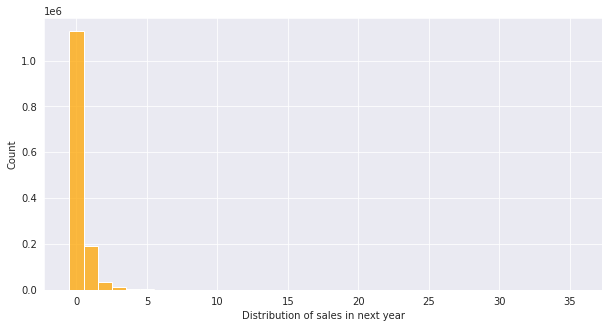

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customer_data, x='cur_yr_sales', bins=50, color='orange')
ax.set_xlabel('Distribution of sales in next year')
plt.show()


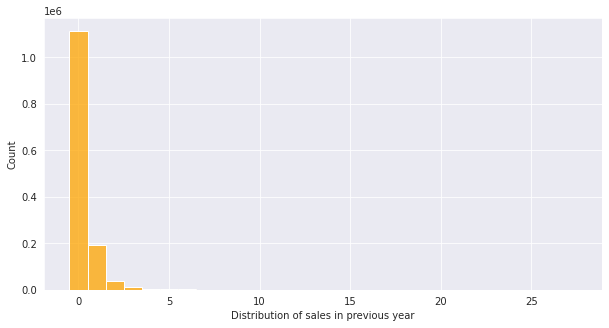

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customer_data, x='last_yr_sales_sum', bins=50, color='orange')
ax.set_xlabel('Distribution of sales in previous year')
plt.show()